<a href="https://colab.research.google.com/github/jinwoo3239/nlp_study_basic/blob/main/2_Count_based_word_representation_%26_Text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Count based word representation

- Bag of words
- Document-Term metrix (DTM)
- Term frequency-Invese Document Frequency (Tf-IDF)
- vector similarity
- RNN Text generation

## Bag of words

In [ ]:
import nltk
nltk.download('popular')

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
corpus = ['you know I want your love. because I love you.']

vector = CountVectorizer()


# word frequency from corpus
print('bag of words vector :', vector.fit_transform(corpus).toarray())

# word index
print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [3]:
stop_words = nltk.corpus.stopwords.words('english')

vector = CountVectorizer(stop_words=stop_words)

bag_of_words = vector.fit_transform(corpus).toarray()
vocab = vector.vocabulary_

print(bag_of_words)
print(vocab)

[[1 2 1]]
{'know': 0, 'want': 2, 'love': 1}


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

# stop_words = nltk.corpus.stopwords.words('english')
vector = CountVectorizer()

dtm = vector.fit_transform(corpus).toarray()
dtm

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]])

## Term frequency-Inverse Document Frequency (Tf-IDF)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
tfidf = vector.fit_transform(corpus).toarray()
tfidf

array([[0.        , 0.46735098, 0.        , 0.46735098, 0.        ,
        0.46735098, 0.        , 0.35543247, 0.46735098],
       [0.        , 0.        , 0.79596054, 0.        , 0.        ,
        0.        , 0.        , 0.60534851, 0.        ],
       [0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        ]])

## Vector similarity
- `sklearn.metrics.pairwise.cosine_smilarity`
- https://www.kaggle.com/rounakbanik/the-movies-dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data = data.head(10000)
data['overview'] = data['overview'].fillna('')
data = data[['overview', 'title']]

In [2]:
data.head()

,overview,title
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,When siblings Judy and Peter discover an encha...,Jumanji
2,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,Just when George Banks has recovered from his ...,Father of the Bride Part II


In [3]:
vector = TfidfVectorizer(stop_words='english')

tfidf = vector.fit_transform(data.overview).toarray()
tfidf.shape

(10000, 32350)

In [4]:
cosine_sim = cosine_similarity(tfidf, tfidf)
cosine_sim.shape

(10000, 10000)

In [ ]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

get_recommendations('Father of the Bride Part II')

In [38]:
title_to_index = dict(zip(data['title'], data.index))

def get_recommedation(title):

    title_index = title_to_index[title]
    similarity_score = cosine_sim[title_index]
    similarity_score = list(enumerate(similarity_score))
    sorted_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    sorted_score = sorted_score[1:6]
    movie_index = [index for index, socore in sorted_score]
    movies = data['title'].loc[movie_index]
    score = [socore for index, socore in sorted_score]
    return movies

In [39]:
get_recommedation('Toy Story')

2997              Toy Story 2
8327                The Champ
1071    Rebel Without a Cause
3057          Man on the Moon
1932                Condorman
Name: title, dtype: object

## RNN text generation

In [40]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다"""

text

'경마장에 있는 말이 뛰고 있다\n그의 말이 법이다\n가는 말이 고와야 오는 말이 곱다'

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1

In [51]:
tokenizer.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [70]:
sequences = []

for line in text.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [71]:
max_len = max([len(l) for l in sequences])

sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]], dtype=int32)

In [72]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [73]:
y = tf.keras.utils.to_categorical(y)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [75]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 8
hidden_dim = 32

class mymodel(tf.keras.Model):

    def __init__(self, ):
        super(mymodel, self).__init__()

        self.embedding = layers.Embedding(vocab_size, embedding_dim)
        self.rnn = layers.SimpleRNN(units=hidden_dim, )
        self.dense = layers.Dense(vocab_size, activation='softmax')

    def call(self, x, training=False):
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.dense(x)
        return x

model = mymodel()

In [77]:
model.build(X.shape)
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  96        
                                                                 
 simple_rnn (SimpleRNN)      multiple                  1312      
                                                                 
 dense (Dense)               multiple                  396       
                                                                 
Total params: 1,804
Trainable params: 1,804
Non-trainable params: 0
_________________________________________________________________


In [79]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop()
metrics = tf.keras.metrics.CategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=[metrics])

In [106]:
history = model.fit(X, y, epochs=300, verbose=0)

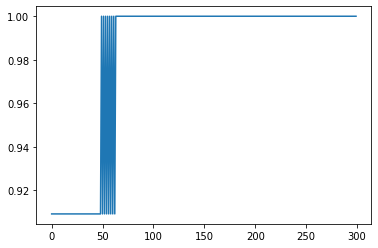

In [107]:

plt.plot(history.epoch, history.history['categorical_accuracy'])

In [120]:
def sentence_generator(model, tokenizer, word, num):

    current_word = word

    for _ in range(num):
        encoded = tokenizer.texts_to_sequences([current_word])
        encoded = pad_sequences(encoded, maxlen=5)

        prediction = model.predict(encoded)
        prediction_index = np.argmax(prediction, axis=1).item()

        index_word = {index: word for word, index in tokenizer.word_index.items()}
        predict_word = index_word[prediction_index]

        current_word = current_word + ' ' + predict_word
    return current_word

In [121]:
sentence_generator(model, tokenizer, '경마장에', 4)

'경마장에 있는 말이 뛰고 있다'

## LSTM text generation
- https://www.kaggle.com/aashita/nyt-comments

In [3]:
from string import punctuation
import matplotlib.pyplot as plt

data = pd.read_csv('ArticlesApril2018.csv')
data.head(2)

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...


In [4]:
head_line = data['headline']
head_line

0       Former N.F.L. Cheerleaders’ Settlement Offer: ...
1       E.P.A. to Unveil a New Rule. Its Effect: Less ...
2                                 The New Noma, Explained
3                                                 Unknown
4                                                 Unknown
                              ...                        
1319    This Common Question Reinforces the Gender Pay...
1320                                   Anna, Llama and Me
1321           Gen. Michael Hayden Has One Regret: Russia
1322                         There Is Nothin’ Like a Tune
1323                                              Unknown
Name: headline, Length: 1324, dtype: object

In [5]:
head_line = data[data.headline != 'Unknown']['headline']

In [6]:
def preprocessing(text):
    preproceseed_sentence = text.encode("utf8").decode("ascii",'ignore')
    sentence = ''.join([word for word in preproceseed_sentence if word not in punctuation]).lower()
    return sentence

head_line_list = [preprocessing(text) for text in head_line]

In [7]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(head_line_list)
vocab_size = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
index_word = {index: word for word, index in word_index.items()}

In [8]:
encoded = tokenizer.texts_to_sequences(head_line_list)
len(encoded)

1214

In [9]:
sequences = []
for line in encoded:
    for index in range(1, len(line)):
        sequence = line[:index+1]
        sequences.append(sequence)


In [10]:
pad_encoded = pad_sequences(sequences, maxlen=24, padding='pre')
len(pad_encoded)

7803

In [11]:
X = pad_encoded[:, :-1]
y = pad_encoded[:, -1]
y = to_categorical(y)

In [38]:
embedding_dim = 16
hidden_dim = 64

class mymodel(tf.keras.Model):

    def __init__(self, ):
        super(mymodel, self).__init__()

        self.embedding = layers.Embedding(vocab_size, embedding_dim)
        self.lstm = layers.LSTM(hidden_dim)
        self.dropout = layers.Dropout(0.2)
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(vocab_size, activation='softmax')

    def call(self, x, training=False):
        x = self.embedding(x)
        x = self.lstm(x)
        x = self.dense1(x)
        x = self.dropout(x, training=training)
        x = self.dense2(x)
        return x

model = mymodel()

In [39]:
model.build(X.shape)
model.summary()

Model: "mymodel_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     multiple                  55904     
                                                                 
 lstm_4 (LSTM)               multiple                  20736     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  4160      
                                                                 
 dense_8 (Dense)             multiple                  227110    
                                                                 
Total params: 307,910
Trainable params: 307,910
Non-trainable params: 0
_________________________________________________________________


In [45]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
metrics = tf.keras.metrics.CategoricalAccuracy()

model.compile(loss=loss_fn, metrics=[metrics], optimizer=optimizer)

In [46]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
244/244 [==============================] - 3s 6ms/step - loss: 6.8754 - categorical_accuracy: 0.0551
Epoch 2/100
244/244 [==============================] - 2s 6ms/step - loss: 6.9367 - categorical_accuracy: 0.0620
Epoch 3/100
244/244 [==============================] - 2s 6ms/step - loss: 7.0051 - categorical_accuracy: 0.0669
Epoch 4/100
244/244 [==============================] - 2s 6ms/step - loss: 7.0485 - categorical_accuracy: 0.0711
Epoch 5/100
244/244 [==============================] - 2s 6ms/step - loss: 7.0555 - categorical_accuracy: 0.0707
Epoch 6/100
244/244 [==============================] - 1s 6ms/step - loss: 7.1071 - categorical_accuracy: 0.0770
Epoch 7/100
244/244 [==============================] - 2s 6ms/step - loss: 7.1137 - categorical_accuracy: 0.0841
Epoch 8/100
244/244 [==============================] - 2s 6ms/step - loss: 7.0474 - categorical_accuracy: 0.0882
Epoch 9/100
244/244 [==============================] - 2s 6ms/step - loss: 6.9964 - categorical_

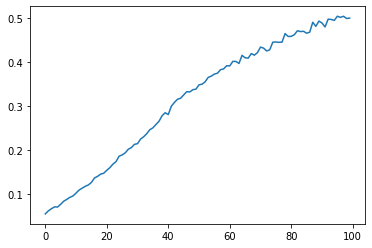

In [47]:
plt.plot(history.epoch, history.history['categorical_accuracy'])

In [54]:
def sentence_generator2(model, tokenizer, word, num):

    current_word = word

    for _ in range(num):
        encoded = tokenizer.texts_to_sequences([current_word])
        encoded = pad_sequences(encoded, maxlen=23, padding='pre')

        prediction = model.predict(encoded)
        prediction_index = np.argmax(prediction, axis=1).item()

        predicted_word = index_word[prediction_index]
        current_word = current_word + ' ' + predicted_word
    return current_word

sentence_generator2(model, tokenizer, 'how to', 10)

'how to make a genius who tells crisis threatens epa back has'